In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightkurve as lk
from astropy.table import Table
# from scipy.signal import savgol_filter
# from scipy.interpolate import CubicSpline

from stuff import *
import exoplanet as xo

from glob import glob

import sys
sys.path.append('/Users/james/Dropbox/research_projects/FFD/')
from FFD import FFD

In [4]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [103]:
files = glob('../data/KIC_8507979*')

lfl_lbol = np.zeros(len(files))
lfl_lbol_err = np.zeros(len(files))
time = np.zeros(len(files))
for k in range(len(files)):
    df = pd.read_csv(files[k])
    totdur = 1 / (10**df['ffd_y'].values[0])
    lfl_lbol[k] = np.sum(df['ED'][df['ED'] > 0]) / (totdur * 24*60*60)
    lfl_lbol_err[k] = np.sqrt(np.sum((df['EDerr']**2)[df['ED'] > 0])) / (totdur * 24*60*60)
    
    time[k] = np.nanmedian(df['tstart'])
    if k==0:
        df_big = df
    else:            
        df_big = pd.concat([df_big, df], ignore_index=True)

df_big.shape

(2221, 8)

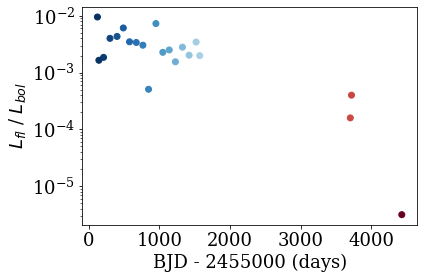

In [112]:
plt.scatter(time-2455000, (lfl_lbol), c=time, cmap=plt.cm.RdBu_r)
# plt.errorbar(time-2455000, (lfl_lbol), yerr=lfl_lbol_err, linestyle='none')
plt.xlabel('BJD - 2455000 (days)')
plt.ylabel('$L_{fl}$ / $L_{bol}$')
plt.yscale('log')
plt.savefig('KIC_8507979.png', dpi=150, bbox_inches='tight', pad_inches=0.25, facecolor='w')

(-0.5, 4.0)

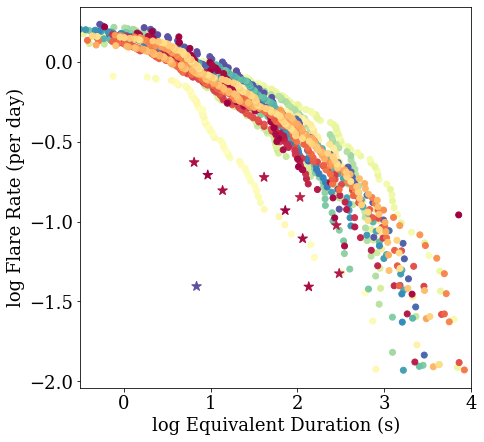

In [119]:
kk = df_big['tstart'] <  2457000
tt = df_big['tstart'] >  2457000
plt.figure(figsize=(7,7)) 
# plt.errorbar(df_big['ffd_x'], df_big['ffd_y'], xerr=df_big['ffd_xerr'], yerr=df_big['ffd_yerr'], 
#              color='k', alpha=0.2, linestyle='none')

# plt.scatter(df_big['ffd_x'], df_big['ffd_y'], c=df_big['tstart'], cmap=plt.cm.RdBu_r)

plt.scatter(df_big['ffd_x'][kk], df_big['ffd_y'][kk], c=df_big['tstart'][kk], cmap=plt.cm.Spectral)
plt.scatter(df_big['ffd_x'][tt], df_big['ffd_y'][tt], c=df_big['tstart'][tt], cmap=plt.cm.Spectral, 
            marker='*', s=100)

# plt.plot([0,3], [1,-2], c='k')

plt.xlabel('log Equivalent Duration (s)')
plt.ylabel('log Flare Rate (per day)')
plt.xlim(-0.5,4)


78.64579620252702

['../data/KIC_8507979_KepL_11.csv',
 '../data/KIC_8507979_KepL_10.csv',
 '../data/KIC_8507979_KepL_9.csv',
 '../data/KIC_8507979_KepL_12.csv',
 '../data/KIC_8507979_KepL_13.csv',
 '../data/KIC_8507979_KepL_8.csv',
 '../data/KIC_8507979_KepL_17.csv',
 '../data/KIC_8507979_KepL_16.csv',
 '../data/KIC_8507979_KepL_14.csv',
 '../data/KIC_8507979_KepL_15.csv',
 '../data/KIC_8507979_TESS_41.csv',
 '../data/KIC_8507979_KepL_3.csv',
 '../data/KIC_8507979_KepL_2.csv',
 '../data/KIC_8507979_KepL_0.csv',
 '../data/KIC_8507979_TESS_15.csv',
 '../data/KIC_8507979_TESS_14.csv',
 '../data/KIC_8507979_KepL_1.csv',
 '../data/KIC_8507979_KepL_5.csv',
 '../data/KIC_8507979_KepL_4.csv',
 '../data/KIC_8507979_KepL_6.csv',
 '../data/KIC_8507979_KepL_7.csv']